In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [53]:

def tv(n):
    a = np.eye(n)[1:] -np.eye(n)[:n-1]
    b = np.ones((1, n))/n
    print(a.shape,b.shape)
    return np.concatenate([a, b], axis=0)

def tvinv(n):
    temp = np.flip((-1) * np.linspace(1 / n, (n - 1) / n, n - 1))
    Temp = np.tile(temp, (n, 1))
    Temp2 = np.tril(np.ones((n, n)), -1)
    pinvgrad = Temp + Temp2[0:n, 0 : n - 1]
    pinvgrad = np.concatenate((pinvgrad, np.ones((n, 1))), axis=1)
    return pinvgrad

In [107]:
tv(4096)

(4095, 4096) (1, 4096)


array([[-1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 2.44140625e-04,  2.44140625e-04,  2.44140625e-04, ...,
         2.44140625e-04,  2.44140625e-04,  2.44140625e-04]])

In [108]:
inv = np.linalg.inv(tv(4096))

(4095, 4096) (1, 4096)


In [98]:
im = mpimg.imread("/Users/user/PycharmProjects/ncmriGYM/brain_mri.jpeg")[64:128, 64:128]
im = im - im.mean()
im[:,0] = 0

print(im.mean())

0.0036163330078125


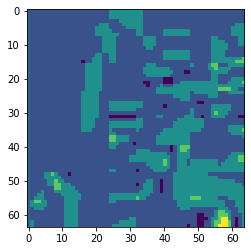

In [99]:
plt.imshow(im)

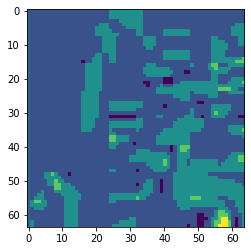

(64, 64)


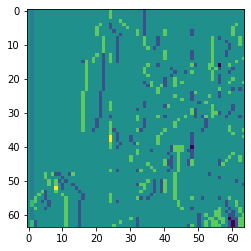

(64, 64)


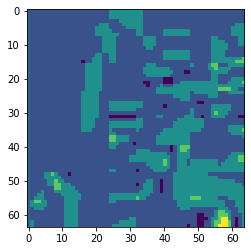

(4095, 4096) (1, 4096)


In [100]:
def op(m, x):
    shape = x.shape
    return np.matmul(x.flatten(), m).reshape(shape)

def tv2(x):
    a = x[:, 1:] - x[:, :-1]
    a =  np.concatenate([np.zeros((x.shape[0], 1)), a], axis=1)
    print(a.shape)
    return a
plt.imshow(im)
plt.show()
plt.imshow(tv2(im))
plt.show()
plt.imshow(np.cumsum(tv2(im), axis=1))
plt.show()

fw = tv(64**2)
bw = tvinv(64**2)

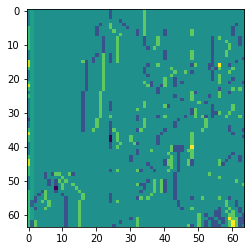

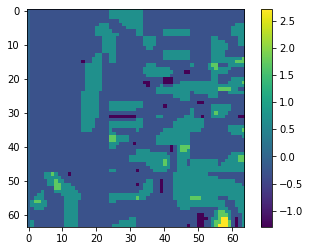

In [101]:
plt.imshow(op(fw, im))
plt.show()
plt.imshow(op(bw, op(fw, im)))
plt.colorbar()
plt.show()

In [102]:
diffs = op(fw, im)

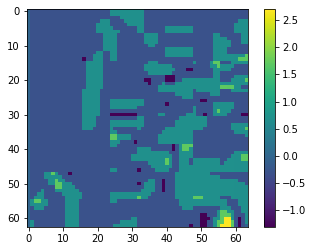

In [103]:
diffs[:,0] = 0
plt.imshow(-np.cumsum(diffs[1:], axis=1))
plt.colorbar()